# **AP155 Lab Assignment Guide** 
## Module 5: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

**Start from this guide and fill in the missing code following the inserted comments (lines starting with #). Explain the solution in your own words (inserting text cells).** 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 25, 25, and 50 points, respectively).

_Due Date_: **December 9 (recommended); January 8 (final)**



### Student Information 

_Full Name (Last Name, First Name)_: Espalmado, Faye\
_Student No._: 2018-11616\
_Section_: WFU

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Faye D. Espalmado** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/25
* Problem 2 - []/25
* Problem 3 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (25 pts.; 50/50 for code & discussion) 
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits. 

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(15 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$. 

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(10 pts.)*

1. The two given differential equations are solved below using the Runge-Kutta method, modified from the rk4.py code from Newman. \
The function `f(r,t)` includes the definition for $\frac{dx}{dt}$ and $\frac{dy}{dt}$ as `fx` and `fy`, and the
`x` and `y` components.\
It is folowed by the initialization and declaration of the given parameters and and arrays. The arrays` tpoints`, `xpoints` and `ypoints `correspond to the data for the time, population of rabbits, population of foxes, respectively. For tpoints, we use arange following the given start and end intervals a and b with h spacing.
\
The 4th-order Runge-Kutta method is performed in the loop `for t in tpoints:` Before the main loop, the array r is declared containing the initial conditions $x=y=2$. New points are added to the list xpoints and ypoints at the start of each loop following the Taylor expansion equations. 

In [1]:
from math import sin
from numpy import array,arange

# user-defined function, following odesim.py in Example 8.5 of Newman text 
def f(r,t): 
    alpha, beta, gamma, delta = 1, 0.5, 0.5, 2# define parameters
    x = r[0]
    y = r[1]
    fx = alpha*x-beta*x*y# define formula based on Lotka-Volterra equations
    fy = gamma*x*y-delta*y# define formula based on Lotka-Volterra equations
    return array([fx,fy],float)

a = 0.0# interval start
b = 30.0# interval end
N = 1000# number of slices
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []

r = array([2.0,2.0],float)# initial conditions
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6


2. The calculated `xpoints` and `ypoints` 
which are the populations of the rabbits and foxes, respectively, are plotted against the `tpoints` time. \
Sarting from t=0, we see that when that when there is an increase in the number of rabbits(x points), there is a decrease in number of foxes(y points). The rabbits reach their maximum population size when the foxes are at their lowest population size. Then the population of the rabbits then start to decline when the population of the foxes rises. Then the trend repeats so on.  This is the cycle of predator-prey relationships


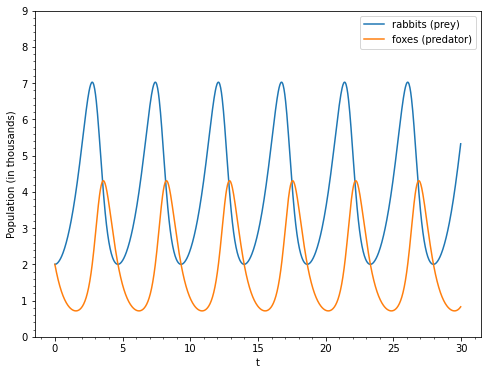

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(tpoints,xpoints,label='rabbits (prey)') # plot curve for population of rabbits/prey; include label keyword for the legend text (label="legend text")
plt.plot(tpoints,ypoints,label='foxes (predator)') # plot curve for population of foxes/predator; include label keyword for the legend text (label="legend text")
plt.xlabel('t') # label horizontal axis
plt.ylabel('Population (in thousands)') # label vertical axis
plt.ylim(0,9) # set y-axis limits

plt.legend(loc="best") # good to keep as is; this adds legend
plt.minorticks_on() # good to keep as is; show minor axis ticks

### PROBLEM 2 (25 pts.; 50/50 for code & discussion)

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(15 pts.)*

2. Make a graph of $\theta$ as a function of time. *(10 pts.)*


1. Here we modify the same code from Problem 1 to solve for the angular displacement for each time period using the 4th-order Runge-Kutta.` f(r,t)` contaons the two differential equations and the
`x` and `y` components of the vector argument `r`. 
The initial theta value `theta_i` is converted to radians since the `sin` function is in radians

In [3]:
from math import sin
from numpy import array,arange,pi

# define initial values 
theta_i = 179*pi/180 # units of rad
omega_i = 0.0# units of rad/s

# define parameters
g = 9.81# units of m/s^2
l = 0.1# units of m

def f(r,t):

    x = r[0]
    y = r[1]
    fx = y# insert formula
    fy = -(g/l)*sin(x)# insert formula 
    return array([fx,fy],float)

a =  0.0# interval start
b =  10.0# interval end
N =  1000# number of slices
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []

r = array([theta_i,omega_i],float)# initial conditions for theta and omega
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6


2. The calculated theta values is using RK algorithm is put into an array `theta` converted back into degrees. The angular displacement over time is then plotted.\
We have the resulting sinusoidal curve. This indicates that the pendulum oscillates from $180^\circ$ to $-180^\circ$over time.

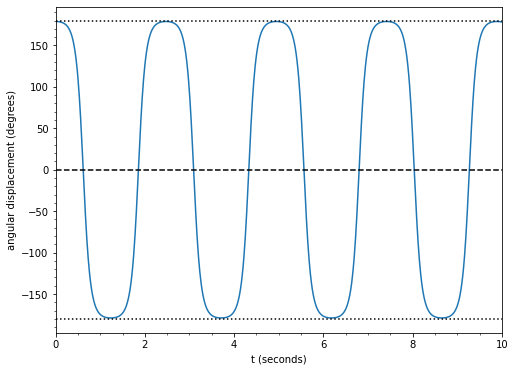

In [4]:
import matplotlib.pyplot as plt
import numpy as np

theta = array(xpoints,float)*180/pi# convert ```xpoints``` calculated above, from radians to degrees

plt.figure(figsize=(8,6))
plt.plot(tpoints,theta) # plot curve of the angular displacement, theta, over time
# add horizontal guidelines -- good to keep as is
plt.axhline(0, color="black", ls='--')
plt.axhline(180, color="black", ls=':')
plt.axhline(-180, color="black", ls=':')
# add labels for the axes
plt.xlabel('t (seconds)') 
plt.ylabel('angular displacement (degrees)')
# set horizontal axis limits 
plt.xlim(0,10) 
# good to keep as is; this adds minor axis ticks
plt.minorticks_on() 

### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Quantum Oscillators**

_Refer to Exercise 8.14 of the Newman text_ Consider the one-dimensional, time-independent Schrodinger equation in a harmonic (i.e., quadratic) potential $V(x) = V_0 x^2 / a^2$, where $V_0$ and $a$ are constants. 

1. Modify the code from Example 8.9 to find the energies of the ground state and the first two excited states for this potential when $m$ is the electron mass, $V_0 = 50$ eV, and $a = 10^{-11}$ m. Note that in theory the wavefunction goes all the way out to $x = \pm \infty$, but you can get good answers by using a large but finite interval. Try using $x = - 10a$ to $+10a$, with the wavefunction $\psi = 0$ at both boundaries. (In effect, you are putting the harmonic oscillator in a box with impenetrable walls.) The wavefunction is real everywhere, so you don't need to use complex variables, and you can use evenly spaced points for the solution-- there is no need to use an adaptive method for this problem.

   The quantum harmonic oscillator is known to have energy states that are equally spaced. Check that this is true, to the precision of your calculation, for your answers. (Hint: The ground state has energy in the range 100 to 200eV.) *(20 pts.)*

2. Modify the code from (1) to calculate the same three energies for the anharmonic oscillator with $V(x) = V_0 x^4 /a^4$, with the same parameter values. *(10 pts.)*

3. Calculate the properly normalized wavefunctions of the anharmonic oscillator for the three states. To normalize the wavefunctions you will have to calculate the value of the integral $\int_{-\infty}^{+\infty} |\psi(x)|^2 {\rm d}x$ and then rescale $\psi$ appropriately to ensure that the area under the square of each of the wavefunctions is 1. Either the trapezoidal rule or Simpson's rule will give you a reasonable value for the integral. *(15 pts.)*

   Note that you may find a few very large values at the end of the array holding the wavefunction. Where do these large values come from? Are they real, or spurious? One simple way to deal with the large values is to make use of the fact that the system is symmetric about its midpoint and calculate the integral of the wavefunction over only the left-hand half of the system, then double the result. This neatly misses out the large values. 

4. Make a plot of the normalized wavefunctions from (3), all on the same axes, as a function of $x$ over a modest range near the origin-- say $x = -5a$ to $x =+5a$. *(5 pts.)*



1. We define first the constants, parameters, intervals that is given to solve the problem. Additionally, the function for the potential well is defined in function `V(x)`.  
Similar to the earlier problems, we will utilize the Runge-Kutta method to solve for the wavefunction. We define the function `f(r,x,E)`, similar to the previous problems with `r` being the input array for variables of interest, `x` as the location of the well and we added the parameter `E` as the value for the energy in the quantum state.\
The main loop for the Runge-Kutta method is then defined within the `solve(E)` function which will solve for the wavefunction for a particular energy.
To solve for the energy states, we utilized the secant method actuated through a `while` loop. We assign first two initial values for energy `E1` and `E2`. Using the solve() function, we find the solution for `E1` and assign it as `psi2`. In the `while` loop, we assign `psi2` to `psi1`, and we use `solve()` with `E2` to assign to `psi2`. Then, `E1` will be reassigned to the `E2` value and `E2` will be calculated using the equation for secant method approximation. The loop will continously update the values until the target accuracy is reached. The resulting `E2` will then be the energy of the state in Joules and will be divided by the constant `e` to convert it to $eV$\
For the ground state we use the initial value guesses of $0$ and $e$ 


In [5]:
from numpy import array,arange

# Define constants
m = 9.1094e-31      # Mass of electron
hbar = 1.0546e-34   # Planck's constant over 2*pi
e = 1.6022e-19      # Electron charge

# Define parameters 
V0 = 50*e# units of Joules
a = 1e-11# units of m

# Define interval
x1 = -10*a# set interval start 
x2 = 10*a# set interval end
N =  1000# set number of slices
h = (x2-x1)/N

# Potential function
def V(x):
    return V0*(x/a)**2 # define potential function

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi# insert formula
    fphi = (2*m/hbar**2)*(V(x)-E)*psi# insert formula
    return array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy
def solve(E):
    psi = 0.0# insert initial value
    phi = 1.0# insert initial value
    r = array([psi,phi],float)

    for x in arange(x1,x2,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]

# Main program to find the energy using the secant method
E1 = 0.0# insert inital value of the first (of two) energy values for the secant method -- in units of J
E2 = e# insert inital value of the second (of two) energy values for the secant method -- in units of J
psi2 = solve(E1) # solve for the wavefunction for the first value

target = e/1000# insert target accuracy
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)# update values for the iteration
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)# update values for the iteration

E_ground = E2/e # convert energy from Joules to eV and store
print("Ground state E =",E_ground,"eV")

Ground state E = 138.02397130603686 eV


We use the same method above to solve for the energy in the first excited state. I guessed the initial values for the energy `E1` and `E2` to be higher than the calculated ground state energy, specifically $200e$ an $400e$. 

In [6]:
# Find another energy level using the secant method
E1 = 200*e# insert new initial value of the first (of two) energy values for the secant method -- in units of J
E2 = 400*e# insert new initial value of the second (of two) energy values for the secant method -- in units of J
psi2 = solve(E1)

target = e/1000# insert target accuracy
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)# update values for the iteration
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)# update values for the iteration

E_excited1 = E2/e # convert energy from Joules to eV and store
print("First excited state E =",E_excited1,"eV")

First excited state E = 414.0719165394437 eV


We solve for the second excited state similar to the the first two states, but with initial energy values of $500e$ and $600e$

In [7]:
# Find another energy level using the secant method
E1 = 500*e# insert new initial value of the first (of two) energy values for the secant method -- in units of J
E2 = 600*e# insert new initial value of the second (of two) energy values for the secant method -- in units of J
psi2 = solve(E1)

target = e/1000# insert target accuracy
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)# update values for the iteration
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)# update values for the iteration

E_excited2 = E2/e
print("Second excited state E =",E_excited2,"eV")

Second excited state E = 690.1198621099132 eV


In [8]:
print("The first and second excited states have energies %.10f and %.10f times the ground energy state" % (E_excited1/E_ground, E_excited2/E_ground)) 

The first and second excited states have energies 3.0000000190 and 5.0000000404 times the ground energy state


We get the energy for the first three states to be $138eV$, $414eV$ and $680eV$, wherein is equal differences of $276eV$ between consecutive states. Furthermore, we also see that the latter two states are multiples of the ground state.\
This is inline with the equation for energy of a harmonic oscillator, which is $E_n=(n+1/2)\hbar\omega$ where $n=0,1,2,...$ which also gives us $E_n=(2n+1)E_0$ where $E_0$ is the ground state energy.


2. Here we reuse the program above, only changing the potential function and the initial energy values for each state

In [9]:
from numpy import array,arange, sqrt

# Define constants
m = 9.1094e-31      # Mass of electron
hbar = 1.0546e-34   # Planck's constant over 2*pi
e = 1.6022e-19      # Electron charge

# Define parameters 
V0 = 50*e# units of Joules
a = 1e-11# units of m

# Define interval
x1 = -10*a# set interval start 
x2 = 10*a# set interval end
N =  1000# set number of slices
h = (x2-x1)/N

# Potential function
def V(x):
    return V0*(x/a)**4 # define potential function

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi# insert formula
    fphi = (2*m/hbar**2)*(V(x)-E)*psi# insert formula
    return array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy
def solve(E):
    psi = 0.0# insert initial value
    phi = 1.0# insert initial value
    r = array([psi,phi],float)

    for x in arange(x1,x2,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]

# Main program to find the energy using the secant method
E1 = 0.0# insert inital value of the first (of two) energy values for the secant method -- in units of J
E2 = e# insert inital value of the second (of two) energy values for the secant method -- in units of J
psi2 = solve(E1) # solve for the wavefunction for the first value

target = e/1000# insert target accuracy
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)# update values for the iteration
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)# update values for the iteration

E_ground2 = E2/e # convert energy from Joules to eV and store
print("Ground state E =",E_ground,"eV")

# Find another energy level using the secant method
E1 = 2*E_ground2*e# insert new initial value of the first (of two) energy values for the secant method -- in units of J
E2 = 4*E_ground2*e# insert new initial value of the second (of two) energy values for the secant method -- in units of J
psi2 = solve(E1)

target = e/1000# insert target accuracy
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)# update values for the iteration
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)# update values for the iteration

E_excited12 = E2/e # convert energy from Joules to eV and store
print("First excited state E =",E_excited12,"eV")

# Find another energy level using the secant method
E1 = 4*E_ground2*e# insert new initial value of the first (of two) energy values for the secant method -- in units of J
E2 = 6*E_ground2*e# insert new initial value of the second (of two) energy values for the secant method -- in units of J
psi2 = solve(E1)

target = e/1000# insert target accuracy
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)# update values for the iteration
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)# update values for the iteration

E_excited22 = E2/e
print("Second excited state E =",E_excited22,"eV")

Ground state E = 138.02397130603686 eV
First excited state E = 735.6912470844682 eV
Second excited state E = 1443.5694213261963 eV


In [10]:
print("The first and second excited states have energies %.10f and %.10f times the ground energy state" % (E_excited12/E_ground2, E_excited22/E_ground2)) 

The first and second excited states have energies 3.5833731582 and 7.0312756022 times the ground energy state


We see that the anharmonic potential does not follow the quantization of the harmonic potential



3. We calculate the wavefunction using Runge-Kutta method given the anharmonic potential and the boundaries x1 and x2. We use the same function definitions above for V() and f().\
Here we introduced the function get_psi(), which is essentially the same as the earlier functions containing the 4th-order Runge-Kutta method. This function produces the $\psi$ values for an energy state and returns arrays x_grid and psi_grid which contains $x$ amd $\psi$ points.

In [11]:
# Define interval
x1 = -5*a# interval start
x2 = 5*a# interval end
N = 1000 # no. of slices
h = (x2-x1)/N

# Potential function
def V(x):
    return V0*x**4/a**4# insert potential function

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi # insert formula
    fphi = (2*m/hbar**2)*(V(x)-E)*psi# insert formula
    return array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy and return 2 arrays: x, psi
def get_psi(E):

    # initialize
    tpoints = arange(x1,x2,h) # x -> t
    xpoints = []              # psi -> x
    ypoints = []              # phi -> y
    
    # set initial conditions
    psi = 0.0 #set initial value
    phi = 1.0# set initial value
    r = array([psi,phi],float)

    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t,E)
        k2 = h*f(r+0.5*k1,t+0.5*h,E)
        k3 = h*f(r+0.5*k2,t+0.5*h,E)
        k4 = h*f(r+k3,t+h,E)
        r += (k1+2*k2+2*k3+k4)/6

    x_grid = array(tpoints)
    psi_grid = array(xpoints)
    return x_grid, psi_grid

The wavefunction for each energy state is calculated by invoking the `get_psi()` function, taking the argument `E` from the corresponding calculated energy values from the previous item.

In [12]:
# Get wavefunction for the first 3 energy levels
E = E_ground2*e
x_grid, psi_grid1 = get_psi(E)

E = E_excited12*e
x_grid, psi_grid2 = get_psi(E)

E = E_excited22*e
x_grid, psi_grid3 = get_psi(E)

The normalization condition for the wavefunctions is given by:
$$\int_{-\infty}^\infty|\psi|^2d\tau=1$$ \
Thus we could utilize the previous methods to calculate the integral, such as the trapezoidal rule. \

The code below applies the trapezoidal rule to get the integral of the wavefunction over the interval over which it had been calculated-- defined in the numpy arrays above.

In [13]:
def get_integral(xx, yy):

  N = len(xx)
  s = 0.5*yy[0] + 0.5*yy[-1]
  for k in range(1,N):
    s += yy[k]

  return s

We then calculate for the normalization coefficients `c1`,`c2`, and `c3` by getting the integrals of corresponding states `x_grid` and `psi_grid` values using the function defined above and get its square roots using the *numpy* `sqrt()` function



In [14]:
c1 = sqrt(get_integral(x_grid,psi_grid1**2))# insert formula
c2 = sqrt(get_integral(x_grid,psi_grid2**2))# insert formula
c3 = sqrt(get_integral(x_grid,psi_grid3**2))# insert formula

print("Normalization factors for the first 3 energy states: %.6e, %.6e, %.6e" % (c1,c2,c3))

Normalization factors for the first 3 energy states: 8.999405e-05, 2.530261e-05, 8.289649e-06


We then divide each $\psi$ values with their respective normalization coefficients produced above, getting the normalized wavefunctions. 

In [15]:
psi_norm1 = psi_grid1/c1# insert formula
psi_norm2 = psi_grid2/c2# insert formula
psi_norm3 = psi_grid3/c3# insert formula

4. Here we plot the normalized wavefunctions over the scaled x-values. \
From here, we see that as it goes to a higher state, the number of peaks increase, indicating that the wavelengths are also shorter. Thus we can infer that the energy increases as we go to a higher state. Additionally, even numbered states produces an even wavefunction, and odd numbered state produces an odd wavefunction.

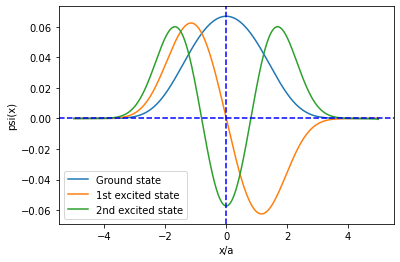

In [16]:
xplot = x_grid/a # plot the scaled position (by a) 
plt.plot(xplot, psi_norm1, label="Ground state") # plot wavefunction of ground state 
plt.plot(xplot, psi_norm2, label="1st excited state") # plot wavefunction of first excited state 
plt.plot(xplot, psi_norm3, label="2nd excited state") # plot wavefunction of second excited state 
# insert guidelines -- OK to keep as is
plt.axhline(0.0, ls='--', color='blue')
plt.axvline(0.0, ls='--', color='blue')
plt.xlabel("x/a") # label horizontal axis
plt.ylabel("psi(x)") # label vertical axis
plt.legend()